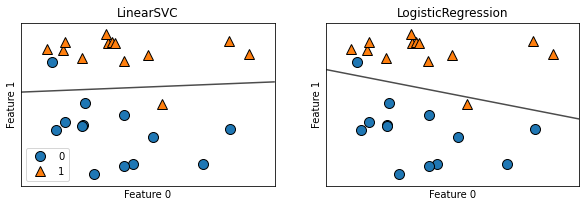

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y=mglearn.datasets.make_forge()
fig, axes=plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

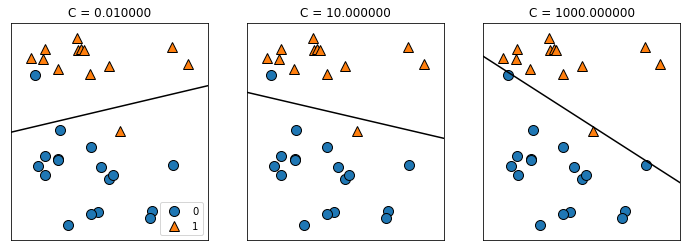

In [2]:
mglearn.plots.plot_linear_svc_regularization()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(cancer.data,cancer.target,random_state=42)
logreg=LogisticRegression().fit(X_train,y_train)
print('Training set score: {:.3f}'.format(logreg.score(X_train,y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test,y_test)))

Training set score: 0.958
Test set score: 0.958


In [4]:
logreg100=LogisticRegression(C=100).fit(X_train,y_train)
print('Training set score: {:.3f}'.format(logreg100.score(X_train,y_train)))
print('Test set score: {:.3f}'.format(logreg100.score(X_test,y_test)))

Training set score: 0.944
Test set score: 0.965


In [5]:
logreg001=LogisticRegression(C=0.01).fit(X_train,y_train)
print('Training set score: {:.3f}'.format(logreg001.score(X_train,y_train)))
print('Test set score: {:.3f}'.format(logreg001.score(X_test,y_test)))

Training set score: 0.925
Test set score: 0.958


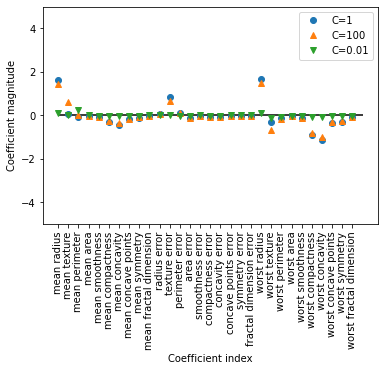

In [6]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend()

In [7]:
# Attention! This block can not run!

# for C, marker in zip([0.001,1,100],['o','^','v']):
#     lr_l1=LogisticRegression(C=C,penalty='l1').fit(X_train,y_train)
#     print('Training accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C,lr_l1.score(X_train,y_train)))
#     print('Test accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C,lr_l1.score(X_test,y_test)))
# plt.plot(lr_l1.coef_.T,marker,label='C={:.3f}'.format(C))
# plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
# plt.hlines(0,0,cancer.data.shape[1])
# plt.xlabel('Coefficient index')
# plt.ylabel('Coefficient magnitude')
# plt.legend(loc=3)

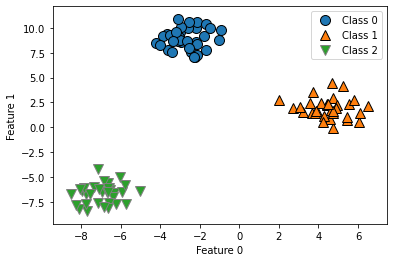

In [8]:
from sklearn.datasets import make_blobs
X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0','Class 1','Class 2'])

In [9]:
linear_svm=LinearSVC().fit(X,y)
print('Coefficient shapre: ',linear_svm.coef_.shape)
print('Intercept shape: ',linear_svm.intercept_.shape)

Coefficient shapre:  (3, 2)
Intercept shape:  (3,)


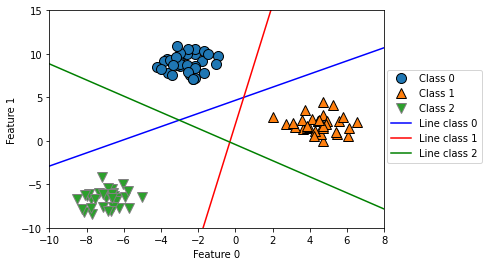

In [10]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))

Text(0, 0.5, 'Feature 1')

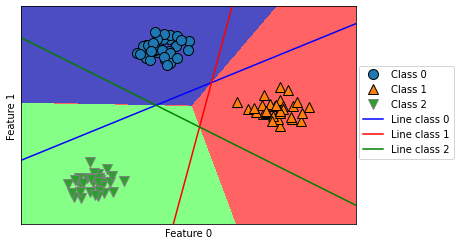

In [11]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')